# 进阶篇：100个pandas常用的数据分析函数总结
本期将分享比较常规的100个实用函数，这些函数大致可以分为六类，分别是统计汇总函数、数据清洗函数、数据筛选、绘图与元素级运算函数、时间序列函数和其他函数。

## 一、统计汇总函数

数据分析过程中，必然要做一些数据的统计汇总工作，那么对于这一块的数据运算有哪些可用的函数可以帮助到我们呢？具体看如下几张表。
![](https://zhangyafei-1258643511.cos.ap-nanjing.myqcloud.com/image/4e59b63bcf62fbeea4654620bf672686.png)
![](https://zhangyafei-1258643511.cos.ap-nanjing.myqcloud.com/image/b05f4ce8211acace3c6625ed5d1597ee.png)


In [1]:
import pandas as pd
import numpy as np

In [2]:
x = pd.Series(np.random.normal(2,3,1000))
y = 3*x + 10 + pd.Series(np.random.normal(1,2,1000))

# 计算x与y的相关系数
print(x.corr(y))

# 计算y的偏度
print(y.skew())

# 计算y的统计描述值
print(x.describe())

z = pd.Series(['A','B','C']).sample(n = 1000, replace = True)
# 重新修改z的行索引
z.index = range(1000)
# 按照z分组，统计y的组内平均值
y.groupby(by = z).aggregate(np.mean)

0.9776553078928453
0.10043364499355907
count    1000.000000
mean        2.195071
std         3.040995
min        -7.842030
25%         0.135092
50%         2.099099
75%         4.229081
max        12.215179
dtype: float64


A    16.642386
B    18.321197
C    17.762354
dtype: float64

![](https://zhangyafei-1258643511.cos.ap-nanjing.myqcloud.com/image/a5043ff19a91538ac5033292e58c79f5.png)

In [3]:
# 统计z中个元素的频次
print(z.value_counts())

a = pd.Series([1,5,10,15,25,30])
# 计算a中各元素的累计百分比
print(a.cumsum() / a.cumsum()[a.size - 1])

A    334
B    333
C    333
dtype: int64
0    0.011628
1    0.069767
2    0.186047
3    0.360465
4    0.651163
5    1.000000
dtype: float64


## 二、数据清洗函数

同样，数据清洗工作也是必不可少的工作，在如下表格中罗列了常有的数据清洗的函数。
![](https://zhangyafei-1258643511.cos.ap-nanjing.myqcloud.com/image/a7be2557201dc99ecd004934198f01dc.png)

In [4]:
x = pd.Series([10,13,np.nan,17,28,19,33,np.nan,27])
#检验序列中是否存在缺失值
print(x.hasnans)
 
# 将缺失值填充为平均值
print(x.fillna(value = x.mean()))
 
# 前向填充缺失值
print(x.ffill())

True
0    10.0
1    13.0
2    21.0
3    17.0
4    28.0
5    19.0
6    33.0
7    21.0
8    27.0
dtype: float64
0    10.0
1    13.0
2    13.0
3    17.0
4    28.0
5    19.0
6    33.0
7    33.0
8    27.0
dtype: float64


![](https://zhangyafei-1258643511.cos.ap-nanjing.myqcloud.com/image/e78497a17379bd08e383561ca040b854.png)

In [5]:
income = pd.Series(['12500元','8000元','8500元','15000元','9000元'])
# 将收入转换为整型
print(income.str[:-1].astype(int))
 
gender = pd.Series(['男','女','女','女','男','女'])
# 性别因子化处理
print(gender.factorize())
 
house = pd.Series(['大宁金茂府 | 3室2厅 | 158.32平米 | 南 | 精装',
                   '昌里花园 | 2室2厅 | 104.73平米 | 南 | 精装',
                   '纺大小区 | 3室1厅 | 68.38平米 | 南 | 简装'])
# 取出二手房的面积，并转换为浮点型
house.str.split('|').str[2].str.strip().str[:-2].astype(float)

0    12500
1     8000
2     8500
3    15000
4     9000
dtype: int32
(array([0, 1, 1, 1, 0, 1], dtype=int64), Index(['男', '女'], dtype='object'))


0    158.32
1    104.73
2     68.38
dtype: float64

## 三、数据筛选

数据分析中如需对变量中的数值做子集筛选时，可以巧妙的使用下表中的几个函数，其中部分函数既可以使用在序列身上，也基本可以使用在数据框对象中。
![](https://zhangyafei-1258643511.cos.ap-nanjing.myqcloud.com/image/f9b60d2971fa2229d7b416d12750099d.png)

In [7]:
np.random.seed(1234)
x = pd.Series(np.random.randint(10,20,10))
 
# 筛选出16以上的元素
print(x.loc[x > 16])

# print(x.compress(x > 16))
 
# 筛选出13~16之间的元素
print(x[x.between(13,16)])
 
# 取出最大的三个元素
print(x.nlargest(3))
 
y = pd.Series(['ID:1 name:张三 age:24 income:13500',
               'ID:2 name:李四 age:27 income:25000',
               'ID:3 name:王二 age:21 income:8000'])
# 取出年龄，并转换为整数
print(y.str.findall('age:(\d+)').str[0].astype(int))

4    18
5    19
7    17
8    19
dtype: int32
0    13
1    16
2    15
3    14
9    16
dtype: int32
5    19
8    19
4    18
dtype: int32
0    24
1    27
2    21
dtype: int32


## 四、绘图与元素级函数
![](https://zhangyafei-1258643511.cos.ap-nanjing.myqcloud.com/image/a7e3fdcb346c8565d909082a34bd70b5.png)

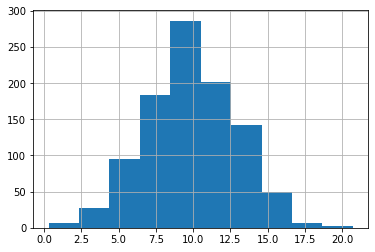

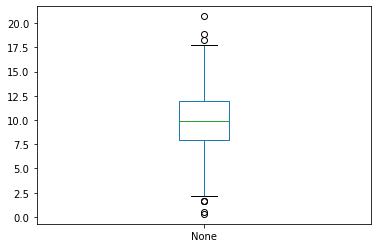

0     1280.0000
1    67000.0000
2     2488.0000
3     1892.0000
4        0.9877
5     9877.0000
6    12000.0000
dtype: float64

In [8]:
np.random.seed(123)
import matplotlib.pyplot as plt
x = pd.Series(np.random.normal(10,3,1000))
# 绘制x直方图
x.hist()
# 显示图形
plt.show()
 
# 绘制x的箱线图
x.plot(kind='box')
plt.show()
 
installs = pd.Series(['1280万','6.7亿','2488万','1892万','9877','9877万','1.2亿'])
# 将安装量统一更改为“万”的单位
def transform(x):
    if x.find('亿') != -1:
        res = float(x[:-1])*10000
    elif x.find('万') != -1:
        res = float(x[:-1])
    else:
        res = float(x)/10000
    return res
installs.apply(transform)

## 五、时间序列函数
![](https://zhangyafei-1258643511.cos.ap-nanjing.myqcloud.com/image/e924378d96dbc7c5c6d92dca2996e965.png)
![](https://zhangyafei-1258643511.cos.ap-nanjing.myqcloud.com/image/e50c552a75c68ea5dc80c2bcb781a2ce.png)
![](https://zhangyafei-1258643511.cos.ap-nanjing.myqcloud.com/image/150a67225fcc3238ab723b742685f619.png)

## 六、其他函数
![](https://zhangyafei-1258643511.cos.ap-nanjing.myqcloud.com/image/e6aa6f62ab26f4d8982d9aafd88ff729.png)

In [9]:
np.random.seed(112)
x = pd.Series(np.random.randint(8,18,6))
print(x)
# 对x中的元素做一阶差分
print(x.diff())
 
# 对x中的元素做降序处理
print(x.sort_values(ascending = False))
 
y = pd.Series(np.random.randint(8,16,100))
# 将y中的元素做排重处理，并转换为列表对象
y.unique().tolist()

0    12
1    16
2     9
3    12
4    13
5    15
dtype: int32
0    NaN
1    4.0
2   -7.0
3    3.0
4    1.0
5    2.0
dtype: float64
1    16
5    15
4    13
0    12
3    12
2     9
dtype: int32


[8, 12, 9, 10, 13, 15, 14, 11]